The exponential integrate and fire model (EIF) is given by:
$$\tau_m u' = -u + \Delta_T exp\Big(\frac{-u - \eta_{rh}}{\Delta_T}\Big) + RI(t) $$

As constants, we set $\tau_m = 10 ms$ and $R = 500M\Omega$.

a) Set $\eta_{rh} = 18 mV$ and $\Delta_T = 1mV$. Plot RHS and vary input current.
What happens to the roots of RHS as $I$ is increased from 0? 

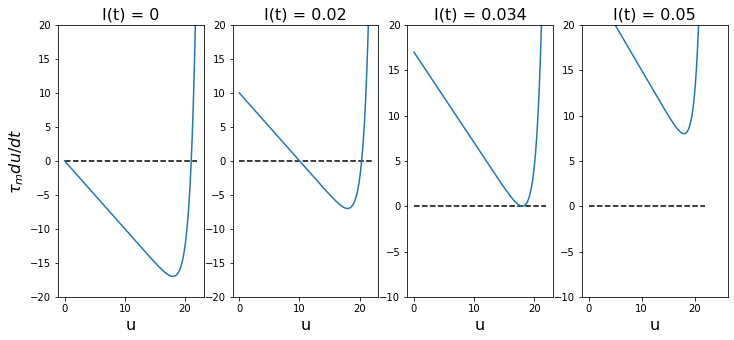

In [106]:
import numpy as np
import matplotlib.pyplot as plt 

def exponential(u,dt,v_rh,R,I):
    taudu = -u+dt*np.exp((u-v_rh)/dt)+R*I
    return(taudu)

#R = 500MΩ,  ηrh = 18mV, ∆T = 1mV 

u  = np.arange(0,22,0.0001)
u2 = np.arange(0,25,0.0001)
du1 = np.zeros(len(u))
du2 = np.zeros(len(u))
du4 = np.zeros(len(u))
du3 = np.zeros(len(u2))
for i in range(len(u)):
    du1[i] = exponential(u = u[i], dt = 1, v_rh = 18, R = 500, I = 0)
    du2[i] = exponential(u = u[i], dt = 1, v_rh = 18, R = 500, I = 0.034)
    du4[i] = exponential(u = u[i], dt = 1, v_rh = 18, R = 500, I = 0.02)
for i in range(len(u2)):
    du3[i] = exponential(u = u2[i], dt = 1, v_rh = 18, R = 500, I = 0.05) 
    
plt.figure(figsize=(12, 5))    
plt.subplot(1, 4, 1)
plt.plot(u, du1);
plt.ylim(-20,20)
plt.hlines(0,0,22,linestyles='dashed');
plt.ylabel('$τ_mdu/dt$', fontsize=16);
plt.xlabel('u', fontsize=16);
plt.title('I(t) = 0', fontsize=16)

plt.subplot(1, 4, 2)
plt.plot(u, du4);
plt.ylim(-20,20)
plt.hlines(0,0,22,linestyles='dashed');
#plt.ylabel('$τ_mdu/dt$', fontsize=16);
plt.xlabel('u', fontsize=16);
plt.title('I(t) = 0.02', fontsize=16)

plt.subplot(1, 4, 3)
plt.plot(u, du2);
plt.ylim(-10,20)
plt.hlines(0,0,22,linestyles='dashed');
plt.xlabel('u', fontsize=16);
plt.title('I(t) = 0.034', fontsize=16)

plt.subplot(1, 4, 4)
plt.plot(u2, du3);
plt.ylim(-10,20)
plt.hlines(0,0,22,linestyles='dashed');
plt.xlabel('u', fontsize=16);
plt.title('I(t) = 0.05', fontsize=16);
u1 = u

(-3, 3)

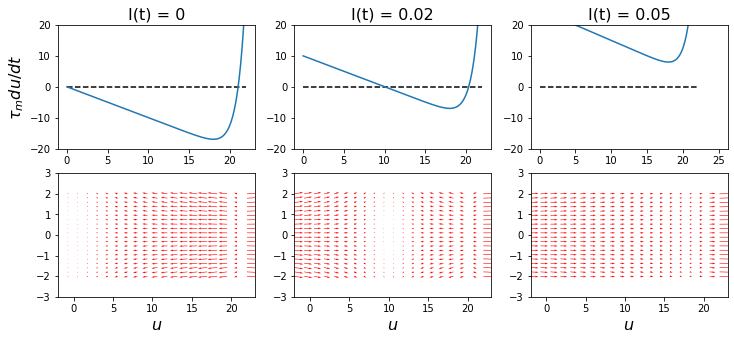

In [111]:
#Showing that U_rest=0 is stable where V_rh is not
# We clearly see the trajectories converge towards U_rest=0, but not V_rh.  
import numpy as np
import matplotlib.pyplot as plt

def getStuff(Ie):
    v_rh=18
    R= 500
    dt = 1
    #Ie=0.02
    def f(Y, t,I):
        y1, y2 = Y
        return [-y1+dt*np.exp((y1-v_rh)/dt)+R*I, y2]

    farLim = 22.0
    y1 = np.linspace(-2.0, farLim, 20)
    y2 = np.linspace(-2.0, 2.0, 20) 

    Y1, Y2 = np.meshgrid(y1, y2)

    t = 0

    u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

    NI, NJ = Y1.shape

    for i in range(NI):
        for j in range(NJ):
            x = Y1[i, j]
            y = Y2[i, j]
            yprime = f([x, y], t,I = Ie)
            u[i,j] = yprime[0]
            v[i,j] = yprime[1]
            
    return Y1,Y2,u,v

#plt.figure()
plt.figure(figsize=(12, 5))    
plt.subplot(2, 3, 1)
plt.plot(u1, du1);
plt.ylim(-20,20)
plt.hlines(0,0,22,linestyles='dashed');
plt.ylabel('$τ_mdu/dt$', fontsize=16);
#plt.xlabel('u', fontsize=16);
plt.title('I(t) = 0', fontsize=16)

plt.subplot(2,3,4)
Y1,Y2,u,v = getStuff(0)
plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('$u$',fontsize = 16)
#plt.ylabel('$y_2$')
plt.xlim([-2, farLim])
plt.ylim([-3, 3])
#plt.title("I = 0")

plt.subplot(2, 3, 2)
plt.plot(u1, du4);
plt.ylim(-20,20)
plt.hlines(0,0,22,linestyles='dashed');
#plt.ylabel('$τ_mdu/dt$', fontsize=16);
plt.xlabel('u', fontsize=16);
plt.title('I(t) = 0.02', fontsize=16)

plt.subplot(2,3,5)
Y1,Y2,u,v = getStuff(0.02)
plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('$u$',fontsize = 16)
#plt.ylabel('$y_2$')
plt.xlim([-2, farLim])
plt.ylim([-3, 3])
#plt.title("I = 0.02")

plt.subplot(2, 3, 3)
plt.plot(u2, du3);
plt.ylim(-20,20)
plt.hlines(0,0,22,linestyles='dashed');
#plt.ylabel('$τ_mdu/dt$', fontsize=16);
plt.xlabel('u', fontsize=16);
plt.title('I(t) = 0.05', fontsize=16)

plt.subplot(2,3,6)
Y1,Y2,u,v = getStuff(0.05)
plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('$u$',fontsize = 16)
#plt.ylabel('$y_2$')
plt.xlim([-2, farLim])
plt.ylim([-3, 3])

b) Simulate the EIF for different values of constant input current as you pass the bifurcation point observed in the previous problem. 
Set threshold around $50mV$. Plot the membrane potential.

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from math import isclose
from numba import jit

U= np.zeros(T)

@jit
def returnU(I,h = 0.00001,T = 15000000,dt = 1, v_rh = 18, R = 500,reset = 50):
    U= np.zeros(T)
    for t in range(T):
        #if (isclose(U[t], reset,abs_tol=20)):
        #    U[t] =0
        if U[t] > reset:U[t] = 0
        U[t+1] = U[t] + h*(-U[t]+dt*np.exp((U[t]-v_rh)/dt)+R*I)
    
    x = np.linspace(0,h*T,T)
    return x,U


he = 0.0001;Te = 15000000
x,U = returnU(0.01)
x3,U3 = returnU(0.034)
he = .0000001; Te = 3000000
x1,U1 = returnU(0.05,h=he,T=Te)
x2,U2 = returnU(0.5,h=he,T=Te)


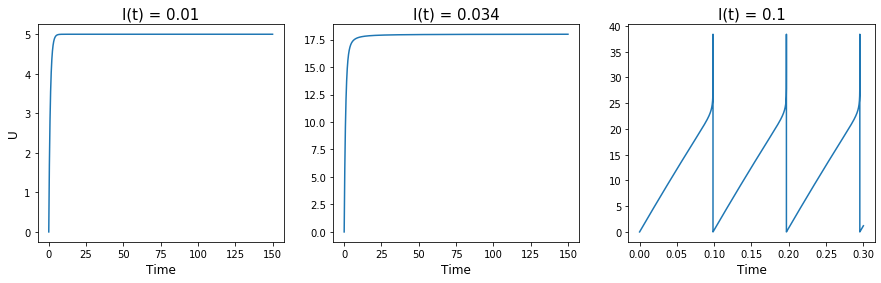

In [97]:
plt.figure(figsize=(15,4))
plt.subplot(1, 3, 1)
plt.plot(x,U)
plt.title('I(t) = 0.01', fontsize = 15)
plt.ylabel('U', fontsize = 12)
plt.xlabel('Time', fontsize = 12)
plt.subplot(1, 3, 2)
plt.plot(x3,U3)
plt.title('I(t) = 0.034', fontsize = 15)
plt.xlabel('Time', fontsize = 12)
plt.subplot(1, 3, 3)
plt.plot(x2,U2)
plt.title('I(t) = 0.1', fontsize = 15)
plt.xlabel('Time', fontsize = 12);

c) Assume the input is described by a Poisson process. Compute the firing rate as a function of the input rate, assuming that the weight of each synapse is $w_k = 1$, with current measured in $pA$. As a result model the effect of each spike as an instantaneous increase in the membrane potential by $\Delta u = 0.5mV$. You can computer the output rate by recording the times between consecutive spikes and dividing by the total number of spikes. Do this for $\Delta_T = 1$, $0.5$, and $0.1$.

In [40]:
import numpy as np
from math import isclose
import matplotlib.pyplot as plt

def partC(dt,numTrials):
    
    def input(x,h):
        return(np.random.poisson(lam = h*x))

    w   = 1;
    v_rh= 18;
    # Length of total time: T
    T  = 100000

    # size of timestep: h
    h  = 0.001 

    # for lambda 0 through 9
    xv = np.arange(0,10)

    #numTrials = 10
    spike_count  = 0
    spike_count2 = np.zeros(numTrials)
    times = np.zeros(numTrials)
    average_spike= np.zeros(len(xv))
    average_time_between = np.zeros(len(xv))
    xaxis = np.linspace(0,T*h,num = T)

    fig, axs = plt.subplots(2,5, figsize=(30, 10))

    axs = axs.ravel()
    for j in range(len(xv)):
        x = xv[j]
        for z in range(numTrials):
            time = 0; first_spike_time = time; last_spike_time = time
            U  = np.zeros(T)
            for t in range(T-1):           
                if input(x,h) > 1:
                    U[t+1] = U[t]+0.5  
                    time += h
                    if spike_count == 0: first_spike_time = time; last_spike_time = time
                    else: last_spike_time = time
                    spike_count = spike_count+1
                else:
                    U[t+1] = U[t] + h*(-U[t]+dt*np.exp((U[t]-v_rh)/dt))
                    time += h
            spike_count2[z] = spike_count
            times[z] = last_spike_time - first_spike_time


        average_spike[j] = np.mean(spike_count2)/(T*h)
        average_time_between[j] = sum(times[np.where(times > 0)])/sum(spike_count2)


        axs[j].set_title( r"$\lambda = $" + str(x),fontsize = 26)
        axs[j].plot(xaxis,U )
        for tick in axs[j].xaxis.get_major_ticks():
            tick.label.set_fontsize(14)
        for tick in axs[j].yaxis.get_major_ticks():
            tick.label.set_fontsize(14)
            
    fig.suptitle(r"$\Delta_t = " + str(dt)+"$",fontsize = 42, y = 1.06)
    fig.tight_layout()
    
    return xv, average_time_between,average_spike


C:\Users\Surface\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in double_scalars


Text(0.5, 1.0, 'Average number of spikes per second')

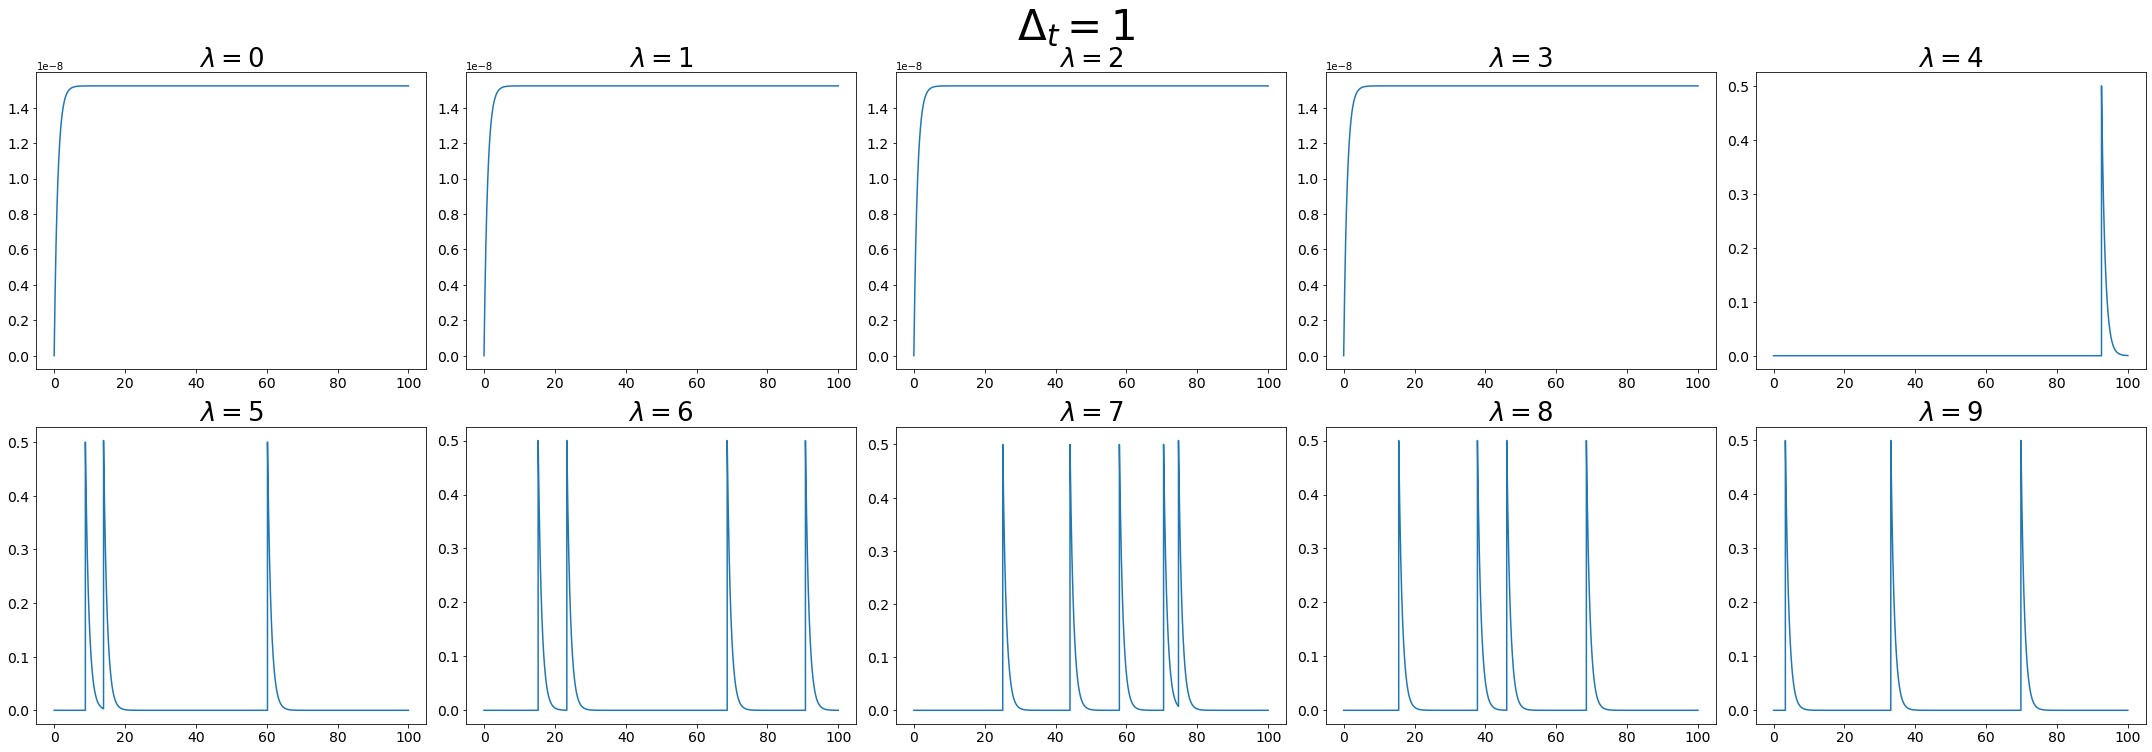

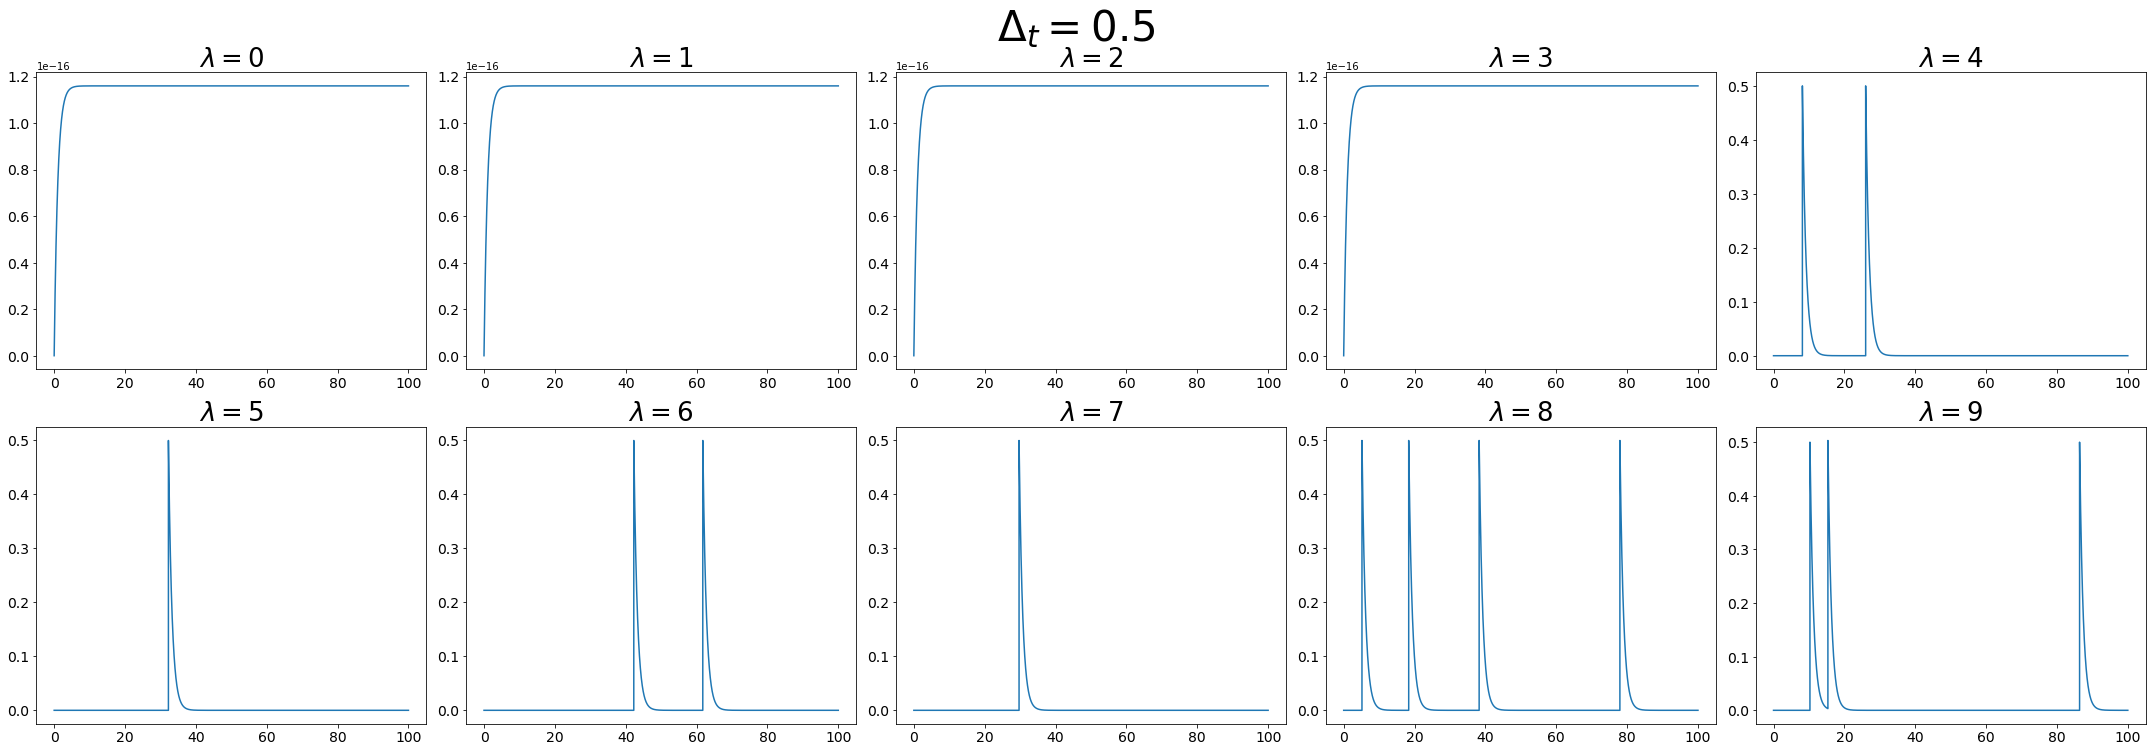

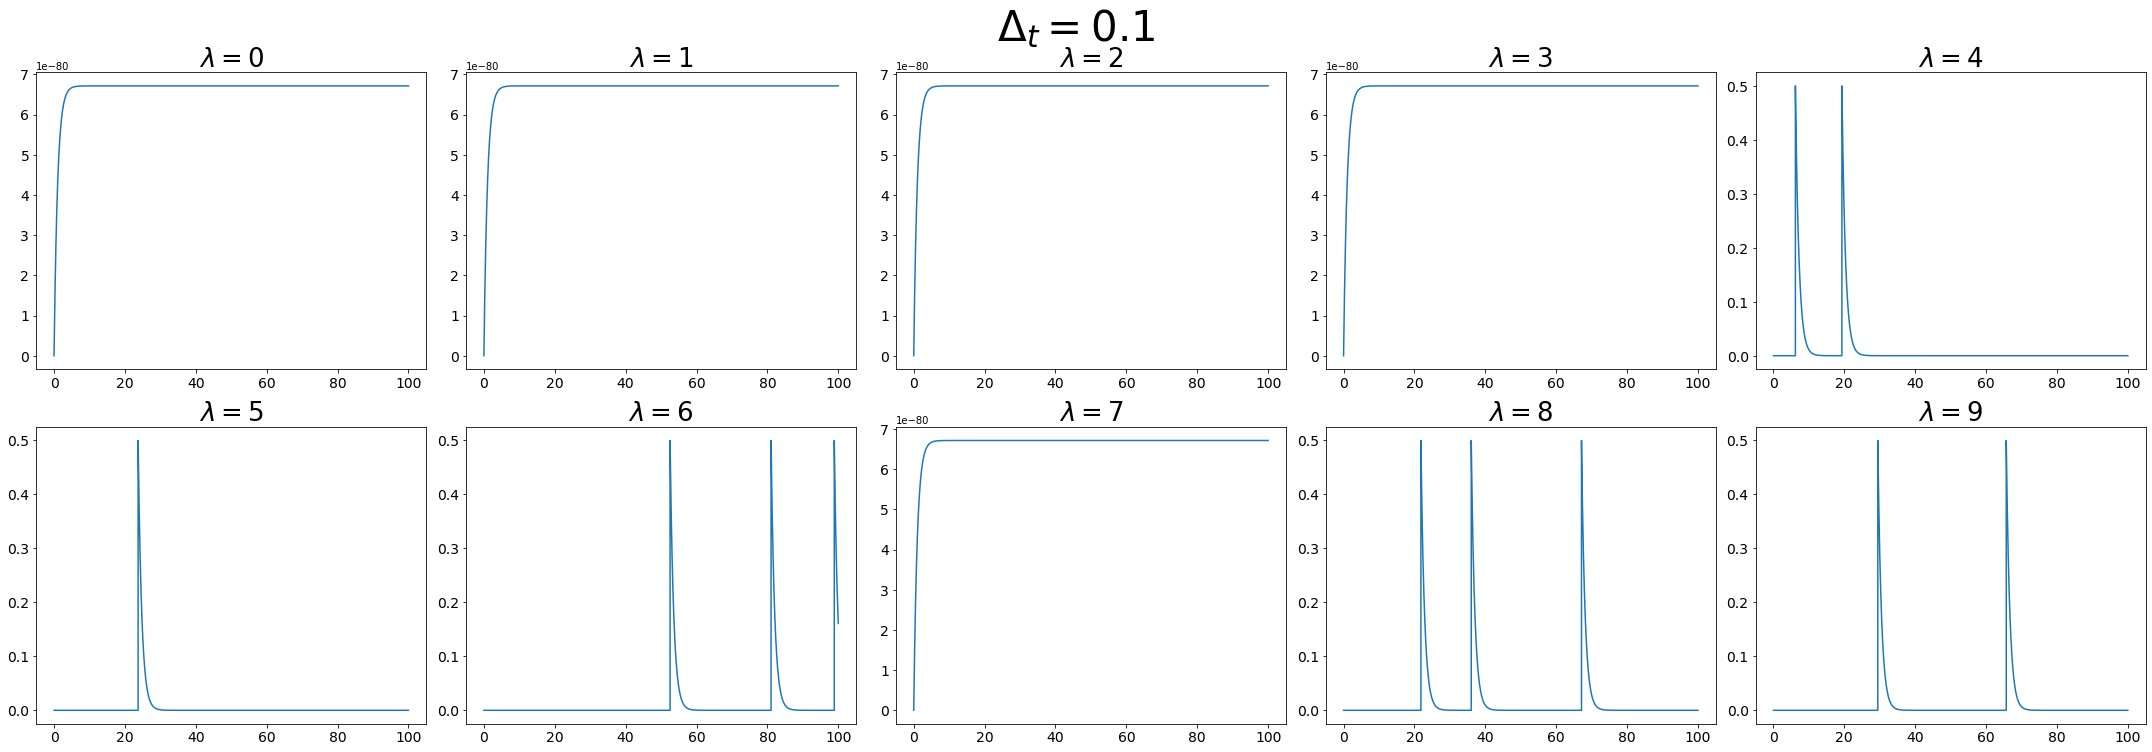

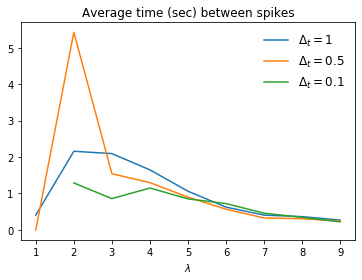

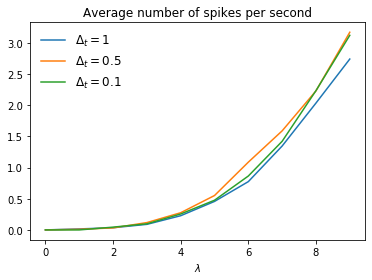

In [42]:
numTrials = 25
xv1, avgTime1, timebtw1 = partC(1,numTrials)
xv0_5, avgTime0_5,timebtw0_5 = partC(.5,numTrials)
xv0_1,avgTime0_1,timebtw0_1 = partC(.1,numTrials)

plt.figure()
plt.plot(xv1,avgTime1, label = r"$\Delta_t = 1$")
plt.plot(xv0_5,avgTime0_5,label = r"$\Delta_t = 0.5$")
plt.plot(xv0_1,avgTime0_1,label = r"$\Delta_t = 0.1$")
plt.xlabel(r"$\lambda$")
plt.legend(frameon = False,fontsize = 12)
plt.title("Average time (sec) between spikes")

plt.figure()
plt.plot(xv1,timebtw1, label = r"$\Delta_t = 1$")
plt.plot(xv0_5,timebtw0_5,label = r"$\Delta_t = 0.5$")
plt.plot(xv0_1,timebtw0_1,label = r"$\Delta_t = 0.1$")
plt.xlabel(r"$\lambda$")
plt.legend(frameon = False,fontsize =12)
plt.title("Average number of spikes per second")